In [12]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [26]:
df_pakistan=df[df['job_country']=='Pakistan'].copy()
df_pakistan['job_posted_month']=df_pakistan['job_posted_date'].dt.strftime('%B')

df_pakistan_pivot=df_pakistan.pivot_table(index='job_posted_month', columns="job_title_short", aggfunc='size')
df_pakistan_pivot=df_pakistan_pivot.reset_index()
df_pakistan_pivot['month_no']=pd.to_datetime(df_pakistan_pivot['job_posted_month'],format='%B').dt.month

df_pakistan_pivot=df_pakistan_pivot.sort_values('month_no')

df_pakistan_pivot=df_pakistan_pivot.set_index('job_posted_month')

df_pakistan_pivot=df_pakistan_pivot.drop(columns='month_no')

df_pakistan_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,12,5,39,89,65,14,6,16,14,35
February,10,5,19,45,28,9,3,17,11,28
March,13,2,26,65,33,14,5,13,15,21
April,7,2,22,39,15,6,1,13,8,7
May,3,1,12,47,22,19,1,10,4,6
June,10,5,15,46,33,12,2,7,2,12
July,6,3,18,50,23,22,1,15,7,26
August,7,5,21,44,16,11,1,7,13,32
September,9,4,27,47,29,26,3,14,8,27


In [ ]:
pd.read_csv("https://lukeb.co/software_csv")

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [34]:
df_US_software_pivot= pd.read_csv("https://lukeb.co/software_csv",index_col="job_posted_month")
df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [35]:
df_pakistan_merged=df_pakistan_pivot.merge(df_US_software_pivot, on="job_posted_month")

In [37]:
top5=df_pakistan_merged.sum().sort_values(ascending=False).head().index.tolist()

top5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

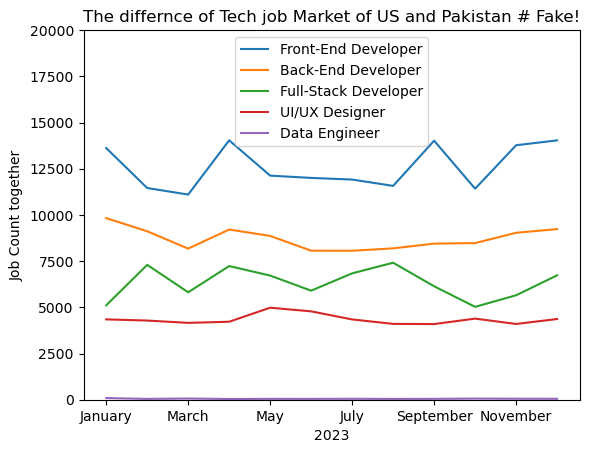

In [44]:
df_pakistan_merged[top5].plot(kind='line')
plt.title("The differnce of Tech job Market of US and Pakistan # Fake!")
plt.ylabel("Job Count together")
plt.xlabel("2023")
plt.ylim(0,20000)
plt.legend
plt.show()

*It is a random Data of job between US and Pakistan Just for my example ! Ps : dont take it serious😂😂*